## Temporal and spatial equity

One of the main criticism faces by integrated assesmment models is that of the temporal equity. Indeed, optimisation models need to be able to compare decisions to select the optimal one among a set of possibilities. This includes comparing decisions that have an effect now and others that have an effect later. A way to compare future impacts of climate change with current investment, for example, is by discounting the future value of these impacts in the way they are accounted for in the present. This reflects the preference for present benefits over futur ones. 



In [6]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

variables = pd.read_csv('../../../variables.csv')
map = gpd.read_file('../../../WILIAM_v1.3/geography/output_countries/countries.shp')

### Temporal equity

In [10]:
ds = xr.open_dataset('../../../results/results_run_2060.nc')
variable = "witness_dicelike_damage"
data = ds[variable].to_dataframe().reset_index()
ds.close()

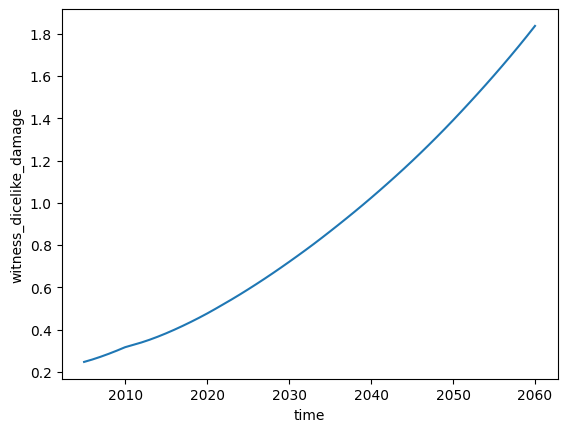

In [14]:
import seaborn as sns

data['witness_dicelike_damage'] = data['witness_dicelike_damage'] * 100
sns.lineplot(
            data=data, 
            x='time',
            y='witness_dicelike_damage')
plt.show()

### Spatial equity

In [4]:
ds = xr.open_dataset('../../../results/results_run_2060.nc')
variable = "fund_a2_agricultural_impact_of_the_rate_of_climate_change"
data = ds[variable].to_dataframe().reset_index()
ds.close()

In [9]:
variables_modelled = variables[variables["Model"].notna()]
variables_modelled

,Unnamed: 0,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment,Model,Equation
3,3,DEFINE: 46: damage function,define_46_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,46
4,4,DEFINE: 46: eta1,define_46_eta1,NaN,NaN,"(nan, nan)",Constant,Normal,Based on Dietz and Stern (2015); Dt = 50% when...,DEFINE,46
5,5,DEFINE: 46: eta2,define_46_eta2,NaN,NaN,"(nan, nan)",Constant,Normal,Based on Dietz and Stern (2015); Dt = 50% when...,DEFINE,46
6,6,DEFINE: 46: eta3,define_46_eta3,NaN,NaN,"(nan, nan)",Constant,Normal,Based on Dietz and Stern (2015); Dt = 50% when...,DEFINE,46
7,7,DEFINE: 46: exponent,define_46_exponent,NaN,NaN,"(nan, nan)",Constant,Normal,NaN,DEFINE,46
...,...,...,...,...,...,...,...,...,...,...,...
151,151,FUND: extra: initial population,fund_extra_initial_population,['REGIONS 35 I'],NaN,"(nan, nan)",Stateful,Initial,NaN,FUND,extra
155,155,WITNESS: dice-like damage,witness_dicelike_damage,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,WITNESS,dice-like damage
156,156,WITNESS: epsilon,witness_epsilon,NaN,NaN,"(nan, nan)",Constant,Normal,NaN,WITNESS,epsilon
157,157,WITNESS: omega,witness_omega,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,WITNESS,omega


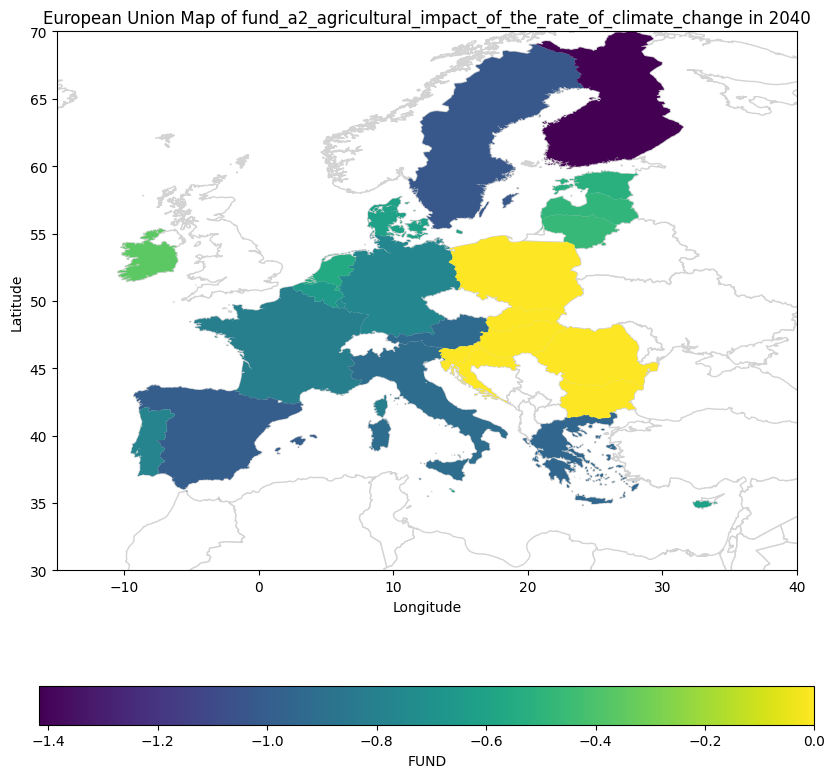

In [44]:
map_time = 2060
data_map = data[data['time'] == map_time]

map_phenomenon = map.merge(data_map, left_on='Region_WIL', right_on='REGIONS 35 I', how='left')




# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
map.plot(ax=ax, color='white', edgecolor='lightgray')
map_phenomenon.plot(ax=ax, 
                    column=variable, 
                    legend=True, 
                    legend_kwds={'label': "FUND", 
                                 'orientation': "horizontal"})

# Set the title and axis labels
ax.set_title(f'European Union Map of {variable} in {map_time}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Define the bounding box coordinates for continental European Union
x_min = -15
x_max = 40
y_min = 30
y_max = 70

# Set the x and y limits of the plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()